In [1]:

import numpy as np
import pandas as pd
import argparse
import matplotlib.pyplot as plt
from iwopy.interfaces.pymoo import Optimizer_pymoo

from iwopy import LocalFD
from iwopy.optimizers import GG

import foxes
import foxes.variables as FV
from foxes.opt.problems.layout import FarmLayoutOptProblem
from foxes.opt.constraints import FarmBoundaryConstraint, MinDistConstraint
from foxes.opt.objectives import MaxFarmPower
from foxes.opt.objectives import MaxNTurbines  

import foxes.opt.problems.layout.geom_layouts as grg      # Purely geometrical layout problems (wake effects are not evaluated).
# to include Wake effect look up: https://fraunhoferiwes.github.io/foxes.docs/api_opt_problems.html#foxes-opt-problems-layout

from iwopy.interfaces.pymoo import Optimizer_pymoo        # some optimization Package idk
import geopandas as gpd



In [2]:
## get timeseries-data (here ERA5 as example)-------
from ERA5 import load_data,calculate_wind_speed,calculate_wind_direction,calculate_averages,check_data_gaps

Era5_path = 'data/reanalysis'  
start_year = 2000
end_year = 2023
    
Era5_data = load_data(Era5_path, start_year, end_year)
Era5_data = calculate_wind_speed(Era5_data)
Era5_data = calculate_wind_direction(Era5_data)
##--------------------------------------------------
data = Era5_data
 
#print(type(data))  
data.columns

c:\Advanced Programming\Project\StudentProject-Yield-Predictions-Offshore\ERA5.py:62: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_time_range = pd.date_range(start=Era5_data.index.min(), end=Era5_data.index.max(), freq='H')


Data Availability is 99.97%
Missing time periods are:
DatetimeIndex(['2023-02-26 00:00:00', '2023-02-26 01:00:00',
               '2023-02-26 02:00:00', '2023-02-26 03:00:00',
               '2023-02-26 04:00:00', '2023-02-26 05:00:00',
               '2023-02-26 06:00:00', '2023-02-26 07:00:00',
               '2023-02-26 08:00:00', '2023-02-26 09:00:00',
               '2023-02-26 10:00:00', '2023-02-26 11:00:00',
               '2023-02-26 12:00:00', '2023-02-26 13:00:00',
               '2023-02-26 14:00:00', '2023-02-26 15:00:00',
               '2023-02-26 16:00:00', '2023-02-26 17:00:00',
               '2023-02-26 18:00:00', '2023-02-26 19:00:00',
               '2023-02-26 20:00:00', '2023-02-26 21:00:00',
               '2023-02-26 22:00:00', '2023-02-26 23:00:00',
               '2023-02-27 00:00:00', '2023-02-27 01:00:00',
               '2023-02-27 02:00:00', '2023-02-27 03:00:00',
               '2023-02-27 04:00:00', '2023-02-27 05:00:00',
               '2023-02-27 06:0

Index(['Time [UTC]', 'u100', 'v100', 'u10', 'v10', 'WS100', 'WS10', 'WD100',
       'WD10'],
      dtype='object')

In [3]:
# Set Boundary
site_shp = gpd.read_file('data/shapefiles/FEP2024_PreDraft/site.shp')
row = site_shp['name_fep']
# print(type(site_shp[site_shp['name_fep']=='N-9.1']))
# print((site_shp[site_shp['name_fep']=='N-9.1']).shape)
GEO_DF = pd.concat([site_shp[row=='N-9.1'] , site_shp[row=='N-9.2'] , site_shp[row=='N-9.3']], ignore_index=True)
#print(GEO_DF.get_coordinates())

boundary = foxes.utils.geom2d.ClosedPolygon(
        np.array(site_shp[row=='N-9.1'].get_coordinates())
    )

Problem 'geom_reg_grid' (GeomRegGrid): Initializing
---------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 5
---------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------
  n_constraints: 2
  n_con_cmptns: 101
---------------------------------------------------
Grid data:
  pmin        = [4034831.0394465 3480275.087553 ]
  pmax        = [4057170.143415  3500481.6654685]
  min dist    = 300.0
  max dist    = 30122.107449026666
  n row max   = 103
  n max       = 10609


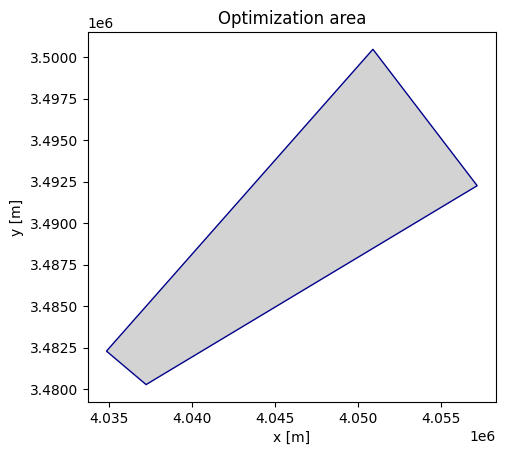

Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampling)
Selecting algorithm: GA (GA)

Problem:
--------
  vectorize: True

Algorithm:
----------
  type: GA
  pop_size: 10
  seed: 42

Termination:
------------
  n_gen: 20
  ftol: 0.005
  xtol: 0.005

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       10 |  5.212101E+07 |  8.960851E+07 |             - |             -
     2 |       20 |  5.089104E+07 |  5.574744E+07 |             - |             -
     3 |       30 |  3.976591E+07 |  5.067738E+07 |             - |             -
     4 |       40 |  2.671870E+07 |  4.335806E+07 |             - |             -
     5 |       50 |  1.994113E+07 |  3.246687E+07 |             - |             -
     6 |       60 |  1.360522E+07 |  2.362867E+07 |             - |             -
     7 |       70 |  1.298635E+07 |  1.660738E+07 |             - |             -
     8 |       80 |  8.532606E+06 |  1.358035E+07 |             - 

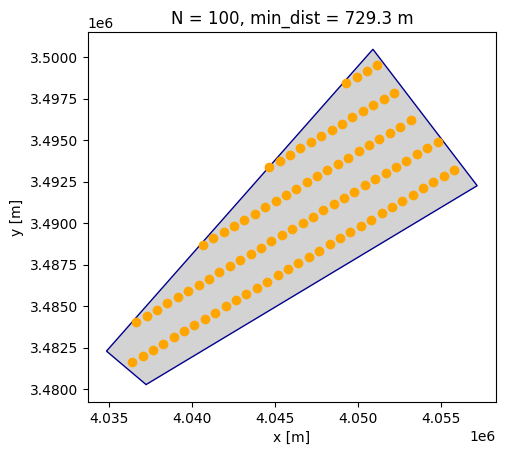

[[4036376.64714827 3481619.49016237]
 [4037002.78824969 3481993.48619529]
 [4037628.9293511  3482367.4822282 ]
 [4036627.42766129 3484044.18817143]
 [4038255.07045252 3482741.47826112]
 [4037253.56876271 3484418.18420434]
 [4038881.21155394 3483115.47429404]
 [4037879.70986413 3484792.18023726]
 [4039507.35265536 3483489.47032695]
 [4038505.85096554 3485166.17627018]
 [4040133.49375678 3483863.46635987]
 [4039131.99206696 3485540.17230309]
 [4040759.6348582  3484237.46239279]
 [4039758.13316838 3485914.16833601]
 [4041385.77595962 3484611.4584257 ]
 [4040384.2742698  3486288.16436893]
 [4042011.91706103 3484985.45445862]
 [4041010.41537122 3486662.16040184]
 [4042638.05816245 3485359.45049154]
 [4041636.55647264 3487036.15643476]
 [4040635.05478282 3488712.86237798]
 [4043264.19926387 3485733.44652445]
 [4042262.69757405 3487410.15246768]
 [4041261.19588424 3489086.8584109 ]
 [4043890.34036529 3486107.44255737]
 [4042888.83867547 3487784.14850059]
 [4041887.33698566 3489460.85444382]
 

In [5]:
# generate a geometric Layout 
from NoWake_Layout import NoWake_Layout

D=100   # we should set this as dependent of the Turb_type
n=100 #
pop_size = 10
n_gen = 20

# ?? how do I get the Machine to stop, when it should be done
NoWake_Layout(boundary,n,D,pop_size,n_gen)
# boundary: the geometric Layout in wich to place the turbines , Foxes - class object
# n :       number of Turbines , int
# D :       Rotor Diameter , int
# pop_size: size of Popolation, int
# n_gen:    numer of generations, int

## Optimze the Layout considering Wake effects

In [7]:
# initialize Model_book
mbook = foxes.models.ModelBook()
ttype = foxes.models.turbine_types.PCtFile("NREL-5MW-D126-H90.csv")
mbook.turbine_types[ttype.name] = ttype

farm = foxes.WindFarm(boundary=boundary)


# read files in path to dataframe and put's those in list 
foxes.input.farm_layout.add_from_df(farm, pd.read_csv("NoWake_Layout.csv")) # also prints Turbines 'Turbine 0, T0: '



Turbine 0, T0: 
Turbine 1, T1: 
Turbine 2, T2: 
Turbine 3, T3: 
Turbine 4, T4: 
Turbine 5, T5: 
Turbine 6, T6: 
Turbine 7, T7: 
Turbine 8, T8: 
Turbine 9, T9: 
Turbine 10, T10: 
Turbine 11, T11: 
Turbine 12, T12: 
Turbine 13, T13: 
Turbine 14, T14: 
Turbine 15, T15: 
Turbine 16, T16: 
Turbine 17, T17: 
Turbine 18, T18: 
Turbine 19, T19: 
Turbine 20, T20: 
Turbine 21, T21: 
Turbine 22, T22: 
Turbine 23, T23: 
Turbine 24, T24: 
Turbine 25, T25: 
Turbine 26, T26: 
Turbine 27, T27: 
Turbine 28, T28: 
Turbine 29, T29: 
Turbine 30, T30: 
Turbine 31, T31: 
Turbine 32, T32: 
Turbine 33, T33: 
Turbine 34, T34: 
Turbine 35, T35: 
Turbine 36, T36: 
Turbine 37, T37: 
Turbine 38, T38: 
Turbine 39, T39: 
Turbine 40, T40: 
Turbine 41, T41: 
Turbine 42, T42: 
Turbine 43, T43: 
Turbine 44, T44: 
Turbine 45, T45: 
Turbine 46, T46: 
Turbine 47, T47: 
Turbine 48, T48: 
Turbine 49, T49: 
Turbine 50, T50: 
Turbine 51, T51: 
Turbine 52, T52: 
Turbine 53, T53: 
Turbine 54, T54: 
Turbine 55, T55: 
Turbine 56, 

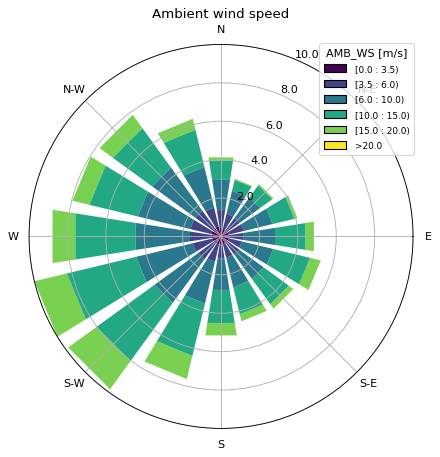

In [8]:
# 2. create the states object and have a look at the wind rose, look at input States 
#    Wind and other atmospheric inflow conditions are called `States`
states = foxes.input.states.Timeseries(                           # StatesTable for panda df or pd readable file (single height)
    data_source = data ,                                           # the data
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "WS100", FV.WD: "WD100", FV.TI: "ti"}, # Mapping from variable names to data column names

    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  # ?? what is TI ?? sometimes also 0.08
)
# Plot windrose
o = foxes.output.StatesRosePlotOutput(states, point=[0., 0., 100.])
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

Turbine 20, T20: NREL-5MW
Turbine 21, T21: NREL-5MW
Turbine 22, T22: NREL-5MW
Turbine 23, T23: NREL-5MW
Turbine 24, T24: NREL-5MW
Turbine 25, T25: NREL-5MW
Turbine 26, T26: NREL-5MW
Turbine 27, T27: NREL-5MW
Turbine 28, T28: NREL-5MW
Turbine 29, T29: NREL-5MW
Turbine 30, T30: NREL-5MW
Turbine 31, T31: NREL-5MW
Turbine 32, T32: NREL-5MW
Turbine 33, T33: NREL-5MW
Turbine 34, T34: NREL-5MW
Turbine 35, T35: NREL-5MW
Turbine 36, T36: NREL-5MW
Turbine 37, T37: NREL-5MW
Turbine 38, T38: NREL-5MW
Turbine 39, T39: NREL-5MW
Problem 'layout_opt' (FarmLayoutOptProblem): Initializing
---------------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 80
---------------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------------
  n_constraints: 1
  n_con_cmptns: 40
---------------------------------------------------------
Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampl

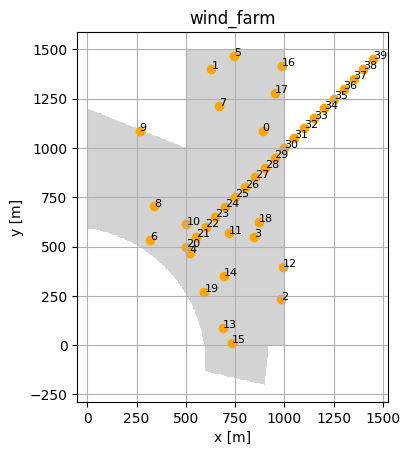

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       50 |  1.267417E+03 |  2.616928E+03 |             - |             -


KeyboardInterrupt: 

In [10]:
min_dist = None

#farm = foxes.WindFarm(boundary=boundary)


states = foxes.input.states.StatesTable(
    data_source="wind_rose_bremen.csv",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.WEIGHT: "weight"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.04},
)

algo = foxes.algorithms.Downwind(
    farm,
    states,
    rotor_model="centre",
    wake_models=["Bastankhah025_quadratic_k002"],
    wake_frame="rotor_wd",
    partial_wakes=None,
    mbook=mbook,
    verbosity=0,
)

with foxes.utils.runners.DaskRunner(
    scheduler=None,
    n_workers=None,
    threads_per_worker=None,
    progress_bar=False,
    verbosity=1,
) as runner:
    problem = FarmLayoutOptProblem("layout_opt", algo, runner=runner)
    problem.add_objective(MaxFarmPower(problem))
    #problem.add_objective(MaxNTurbines(problem))
    problem.add_constraint(FarmBoundaryConstraint(problem))
    if min_dist is not None:
        problem.add_constraint(
            MinDistConstraint(problem, min_dist=min_dist, min_dist_unit="D")
        )
    problem.initialize()

    solver = Optimizer_pymoo(
        problem,
        problem_pars=dict(
            vectorize=not "store_true",
        ),
        algo_pars=dict(
            type="GA",
            pop_size=50,
            seed=None,
        ),
        setup_pars=dict(),
        term_pars=dict(
            type="default",
            n_max_gen=5,
            ftol=1e-6,
            xtol=1e-6,
        ),
    )
    solver.initialize()
    solver.print_info()

    ax = foxes.output.FarmLayoutOutput(farm).get_figure()
    plt.show()
    plt.close(ax.get_figure())

    results = solver.solve()
    solver.finalize(results)

    print()
    print(results)

    fig, axs = plt.subplots(1, 2, figsize=(12, 8))

    foxes.output.FarmLayoutOutput(farm).get_figure(fig=fig, ax=axs[0])

    o = foxes.output.FlowPlots2D(algo, results.problem_results)
    p_min = np.array([-100.0, -350.0])
    p_max = np.array([1100.0, 1600.0])
    fig = o.get_mean_fig_xy(
        "WS",
        resolution=20,
        fig=fig,
        ax=axs[1],
        xmin=p_min[0],
        xmax=p_max[0],
        ymin=p_min[1],
        ymax=p_max[1],
    )
    dpars = dict(alpha=0.6, zorder=10, p_min=p_min, p_max=p_max)
    farm.boundary.add_to_figure(
        axs[1], fill_mode="outside_white", pars_distance=dpars
    )

    plt.show()
    plt.close(fig)